In [1141]:
from manifold_learning import IMD
import numpy as np
from FastCCM import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand,load_csv_dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from manifold_learning import imd_nd_smap
import importlib
importlib.reload(imd_nd_smap)

<module 'manifold_learning.imd_nd_smap' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/imd_nd_smap.py'>

In [432]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [433]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

In [982]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]
X = utils.get_td_embedding_np(X,5,20).reshape(-1,5*X.shape[1])

observables = StandardScaler().fit_transform(X)

In [434]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [435]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

In [1142]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=5,subtract_corr=True, device="cuda")


In [1143]:
trainer.fit(observables, sample_len=50, library_len=700, 
            exclusion_rad=50, omega=None, tp=90, 
            epochs=500, num_batches=32,optimizer="Adam", learning_rate=0.001,tp_policy="range")


Epoch 1/500, Loss: 1.3747
Epoch 2/500, Loss: 1.3277
Epoch 3/500, Loss: 1.3061
Epoch 4/500, Loss: 1.2788
Epoch 5/500, Loss: 1.2690
Epoch 6/500, Loss: 1.2339
Epoch 7/500, Loss: 1.2233
Epoch 8/500, Loss: 1.1961
Epoch 9/500, Loss: 1.1847
Epoch 10/500, Loss: 1.1716
Epoch 11/500, Loss: 1.1564
Epoch 12/500, Loss: 1.1401
Epoch 13/500, Loss: 1.1413
Epoch 14/500, Loss: 1.1225
Epoch 15/500, Loss: 1.1065
Epoch 16/500, Loss: 1.0933
Epoch 17/500, Loss: 1.0832
Epoch 18/500, Loss: 1.0828
Epoch 19/500, Loss: 1.0697
Epoch 20/500, Loss: 1.0686
Epoch 21/500, Loss: 1.0514
Epoch 22/500, Loss: 1.0588
Epoch 23/500, Loss: 1.0405
Epoch 24/500, Loss: 1.0230
Epoch 25/500, Loss: 1.0283
Epoch 26/500, Loss: 1.0174
Epoch 27/500, Loss: 1.0100
Epoch 28/500, Loss: 0.9955
Epoch 29/500, Loss: 0.9936
Epoch 30/500, Loss: 0.9871
Epoch 31/500, Loss: 0.9711
Epoch 32/500, Loss: 0.9928
Epoch 33/500, Loss: 0.9665
Epoch 34/500, Loss: 0.9709
Epoch 35/500, Loss: 0.9641
Epoch 36/500, Loss: 0.9475
Epoch 37/500, Loss: 0.9524
Epoch 38/5

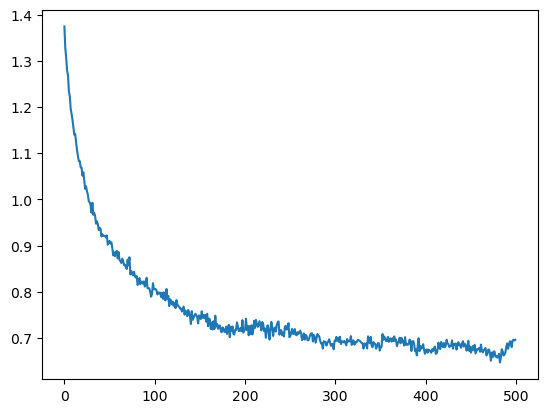

In [1144]:
plt.plot(trainer.get_loss_history()[:])


In [1145]:

unmixed = trainer.predict(observables)

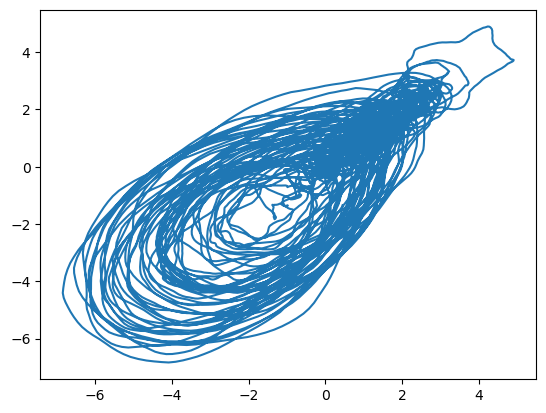

In [1146]:
plt.plot(unmixed[20:,0,2],unmixed[:-20,0,2])

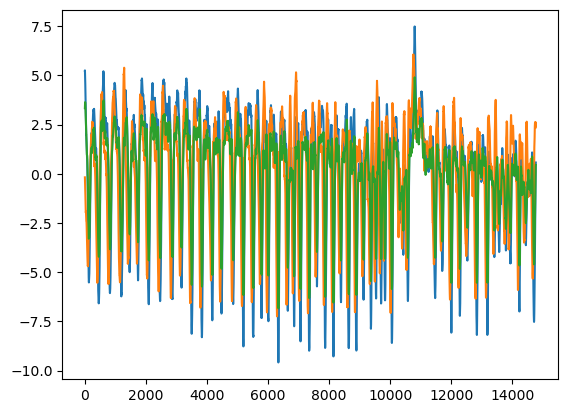

In [1147]:

plt.plot(unmixed[:,0,:])
#plt.xlim(0,2000)

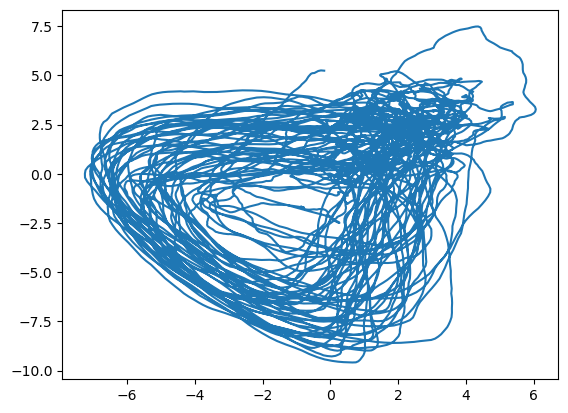

In [1148]:
plt.plot(unmixed[:,0,1], unmixed[:,0,0])

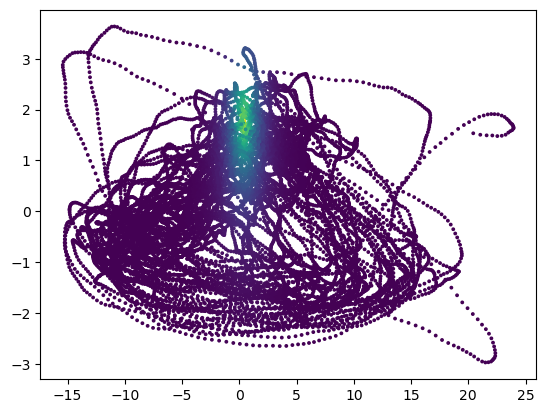

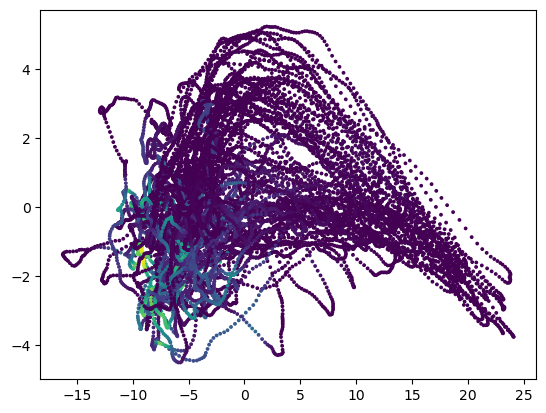

In [1149]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(unmixed[:,1][[2650]],unmixed[:,1])[0]
weights = np.exp(-(1*dist))

x_pca = PCA(2).fit_transform(unmixed[:,1,:])
plt.scatter(x_pca[:-20,0],x_pca[:-20,1],c=weights[:-20],s=3)
plt.show()

x_pca = PCA(2).fit_transform(unmixed[:,2,:])
plt.scatter(x_pca[20:,0],x_pca[20:,1],c=weights[:-20],s=3)

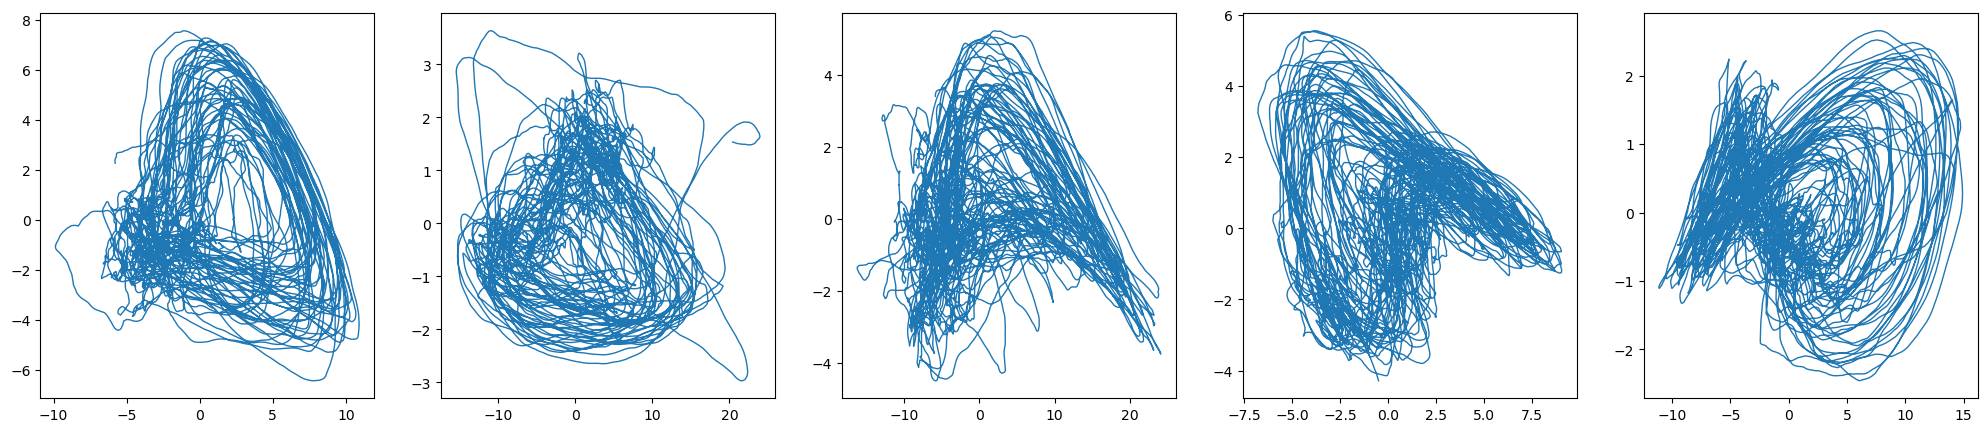

In [1151]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

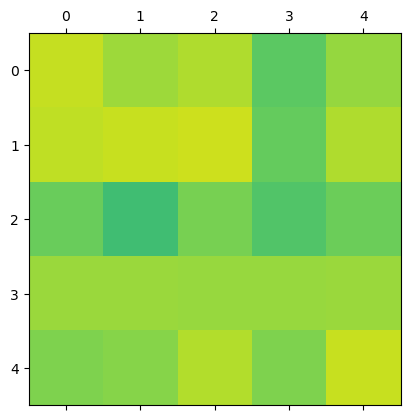

In [1152]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,30,50,False).mean(axis=0),vmin=0,vmax=1)

In [1153]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,0,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [1154]:
fig = px.line_3d(x=unmixed[:,0,0], y=unmixed[:,0,1],z=unmixed[:,0,2],height=700)

fig.show()